# Design of Experiment

In [5]:
#library
#!pip list
%pip install doepy
%pip install ipympl
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from doepy import build



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
#create the dict
ddict = {'Pressure':[40, 55, 70],
          'Temperature':[290, 320, 350],
          'Flowrate':[2, 4, 6]}

# FF design
# frac_fact 
# central-composite

full_fact = build.full_fact(ddict).to_csv('full_fact.csv', index=False)
frac_fact = build.frac_fact_res(ddict).to_csv('frac_fact.csv', index=False)
ccd = build.central_composite(ddict, face='ccc').to_csv('ccd.csv', index=False)


Pressure had more than two levels. Assigning the end point to the high level.
Temperature had more than two levels. Assigning the end point to the high level.
Flowrate had more than two levels. Assigning the end point to the high level.


d:\Software\Anaconda\envs\WinConda\Lib\site-packages\doepy\doe_functions.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.iloc[i][j]=r[j][int(df.iloc[i][j])]
d:\Software\Anaconda\envs\WinConda\Lib\site-packages\doepy\doe_functions.py:

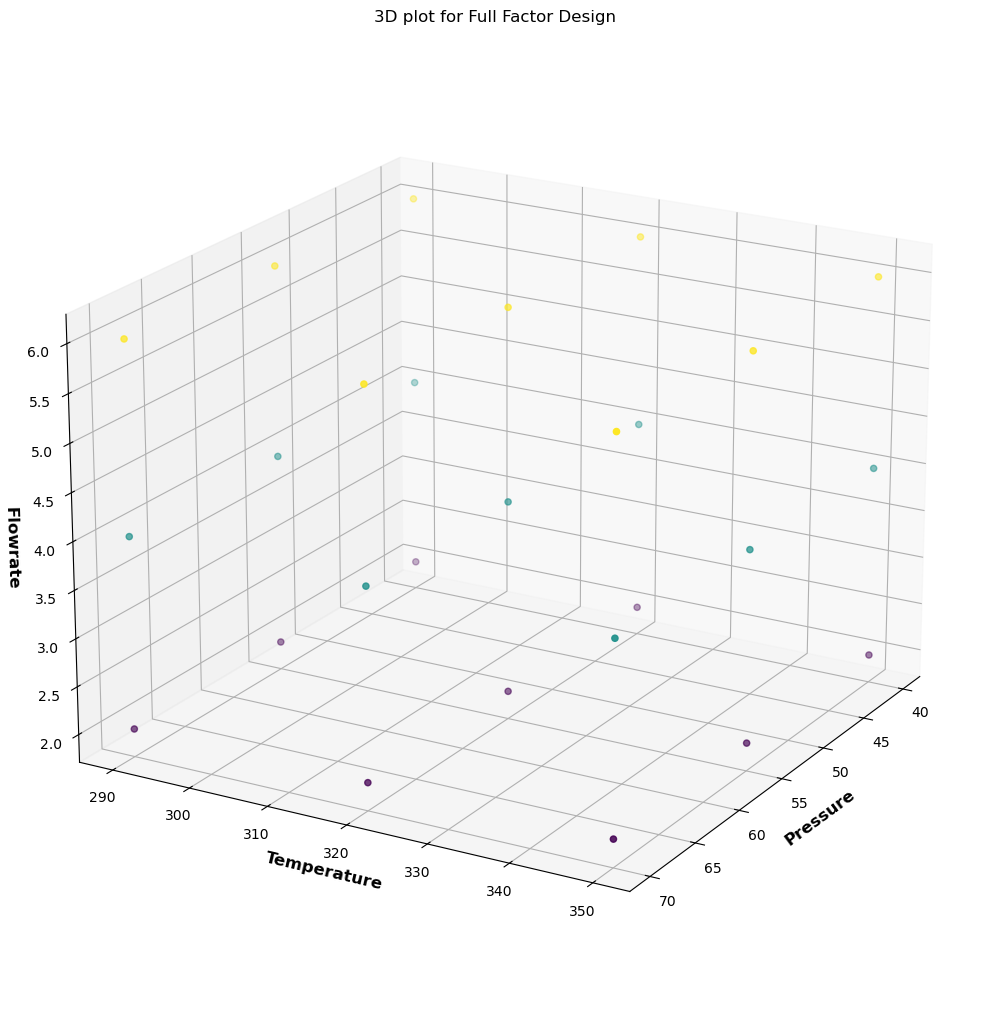

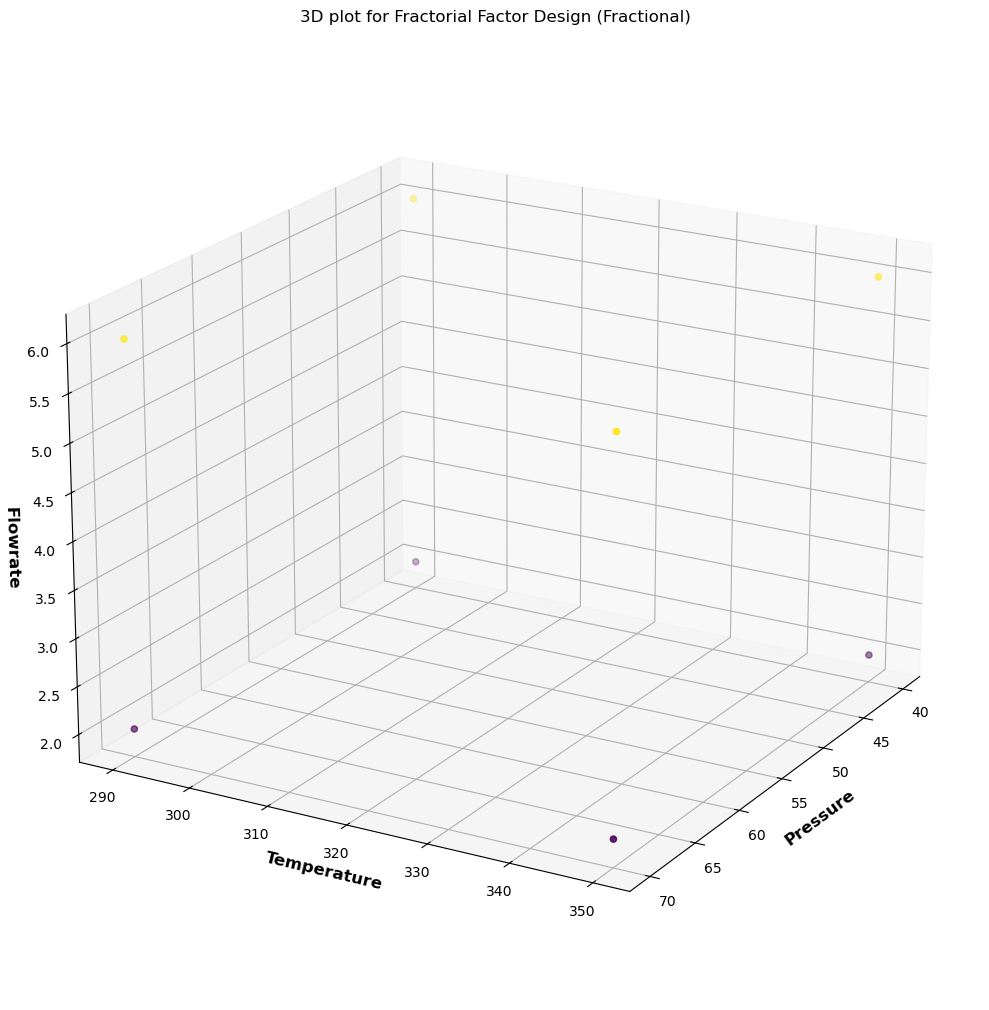

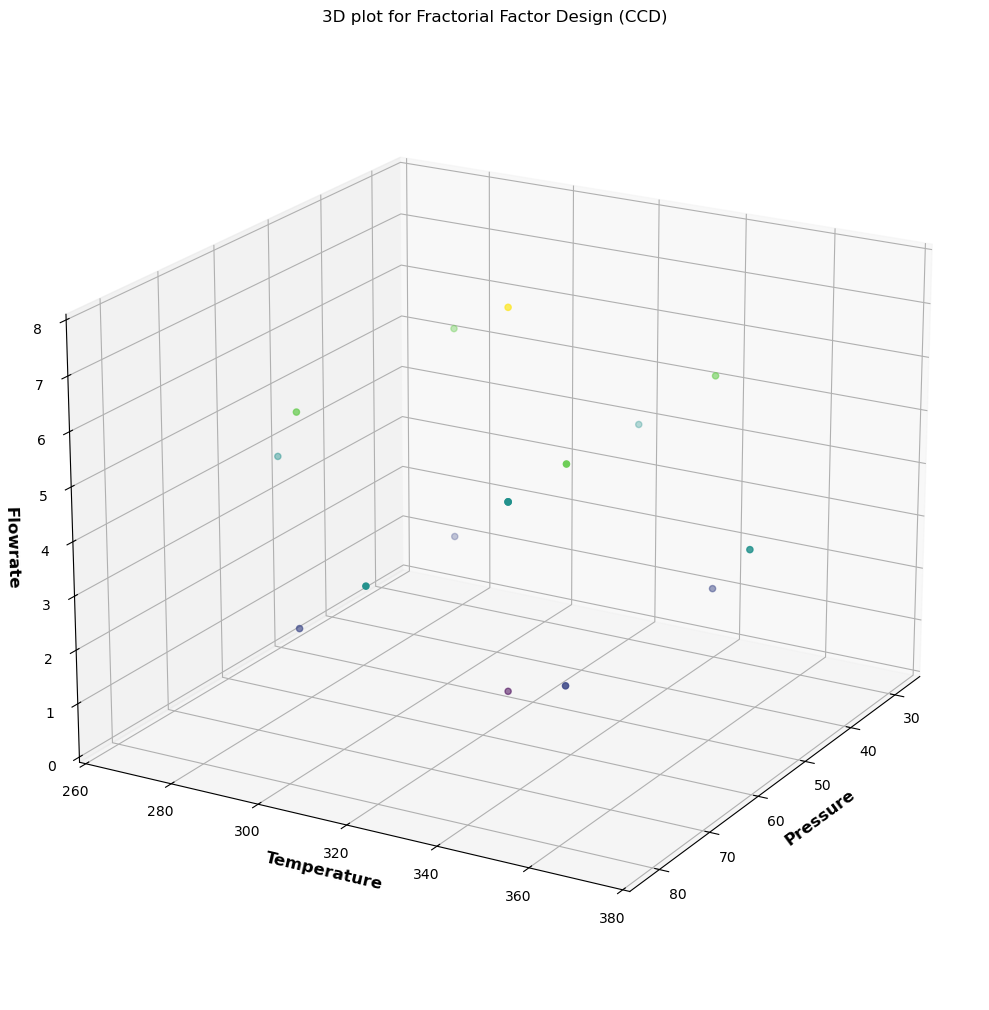

In [21]:


# List of data files and corresponding plot titles
data_files = [ 'full_fact.csv','frac_fact.csv', 'ccd.csv']
titles = ["3D plot for Full Factor Design", 
          "3D plot for Fractorial Factor Design (Fractional)", 
          "3D plot for Fractorial Factor Design (CCD)"]

# Load the data for Full Factor Design separately since it's already loaded
dfs = [pd.read_csv(f) for f in data_files]

# Loop through the dataframes and generate 3D plots
for i, df in enumerate(dfs):
    plt.figure(figsize=(10, 12))
    
    
    ax = plt.axes(111, projection='3d')
    fg = ax.scatter3D(df['Pressure'], df['Temperature'], df['Flowrate'], 
                      c=df['Flowrate'], cmap='viridis')
    
    # Set axis labels and title
    ax.set_xlabel('Pressure', fontweight='bold', fontsize=12)
    ax.set_ylabel('Temperature', fontweight='bold',fontsize=12)
    ax.set_zlabel('Flowrate', fontweight='bold',fontsize=12)
    plt.title(titles[i])
    # Set angle in case zlabel can't show
    ax.view_init(elev=20, azim=30)
    plt.tight_layout()
    # Display the plot
    plt.show()


## Screening experiment